# Milestone 1

# I. Perkenalan

- Nama: Sheila Monica
- Batch: FTDS 013
- Dataset: Telco-Customer-Churn.csv from Telco Customer Churn Dataset
- Dataset Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- Objective: To implement artificial neural network with given dataset

# II. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf 
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import keras
from keras.models import Sequential, Functional
from keras.layers import Dropout, Input, BatchNormalization, Dense
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# III. Data Loading

In [2]:
# Load Dataset

data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Checking Data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking Data

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Checking Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that the TotalCharges column are interestingly written as a string. I will be converting this into a float value column instead.

In [6]:
# Converting TotalCharges column
data['TotalCharges'] = data['TotalCharges'].str.replace("'","")
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [7]:
# Checking Data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [8]:
# Checking null value

def missing_data_table(df):
    miss_value = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([miss_value, percentage], axis=1, keys=['Missing Value', 'Percent'])
    return missing_data

missing_data_table(data)

,Missing Value,Percent
TotalCharges,11,0.001562
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


We can see that there are  missing datas in the TotalCharges column in the dataset. Since there is only 11 missing datas, I will be dropping these missing datas.

In [9]:
# Removing missing values
data = data.dropna()

# IV. Exploratory Data Analysis (EDA)

In [10]:
# Create a duplicate dataframe

data_clone = copy.copy(data)

In [11]:
# Create a duplicate dataframe of only yes or no to churn

data_chn = data_clone[data_clone['Churn'] == 'Yes']
data_nchn = data_clone[data_clone['Churn'] == 'No']

Customers who stopped using Telco: 73.0%
Customers who stopped using Telco: 27.0%


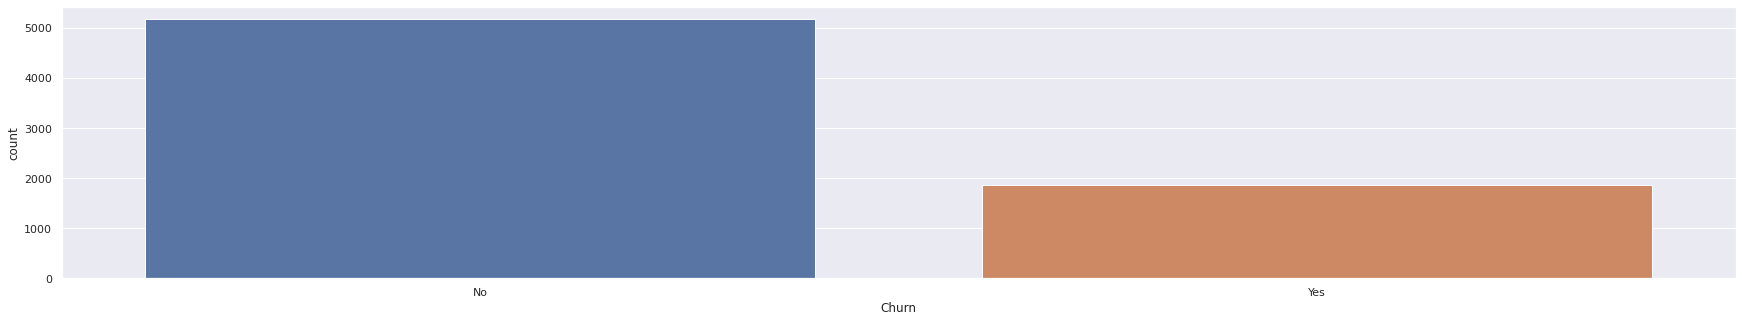

In [12]:
# Graphing Churn count
churncount = data_clone['Churn'].value_counts()

print(f"Customers who stopped using Telco: {round(churncount[0]/(churncount[0]+churncount[1])*100, 0)}%")
print(f"Customers who stopped using Telco: {round(churncount[1]/(churncount[0]+churncount[1])*100, 0)}%")

sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='Churn', data=data_clone)

From the graph, we can see that 1/4 of the customers from the data are stopped using Telco's product or service during a certain time frame.

Male customers who stopped using Telco: 50.0%
Female customers who stopped using Telco: 50.0%
 
Male customers who continue using Telco: 51.0%
Female customers who continue using Telco: 49.0%


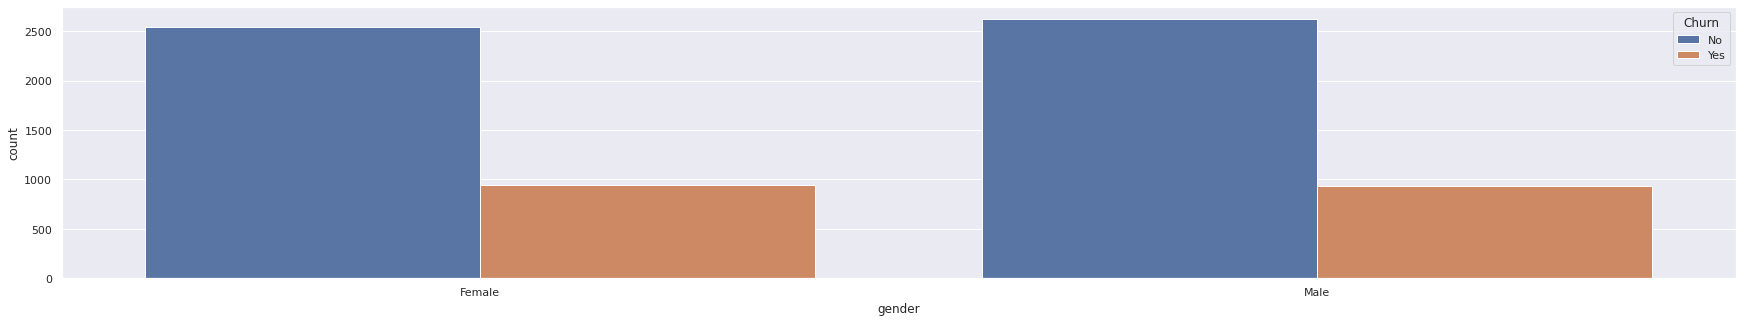

In [13]:
# Counting the Churn gender ratio from the data
gencount = data_chn['gender'].value_counts()
ngencount = data_nchn['gender'].value_counts()

print(f"Male customers who stopped using Telco: {round(gencount[1]/(gencount[0]+gencount[1])*100, 0)}%")
print(f"Female customers who stopped using Telco: {round(gencount[0]/(gencount[0]+gencount[1])*100, 0)}%")
print(" ")
print(f"Male customers who continue using Telco: {round(ngencount[0]/(ngencount[0]+ngencount[1])*100, 0)}%")
print(f"Female customers who continue using Telco: {round(ngencount[1]/(ngencount[0]+ngencount[1])*100, 0)}%")

# Graphing gender count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='gender', data=data_clone, hue='Churn')

From the graph, we can see that gender ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite similar, hence we can see that gender does not affect churn rate.

Senior customers who stopped using Telco: 25.0%
Non-senior customers who stopped using Telco: 75.0%
 
Senior customers who continue using Telco: 13.0%
Non-senior customers who continue using Telco: 87.0%


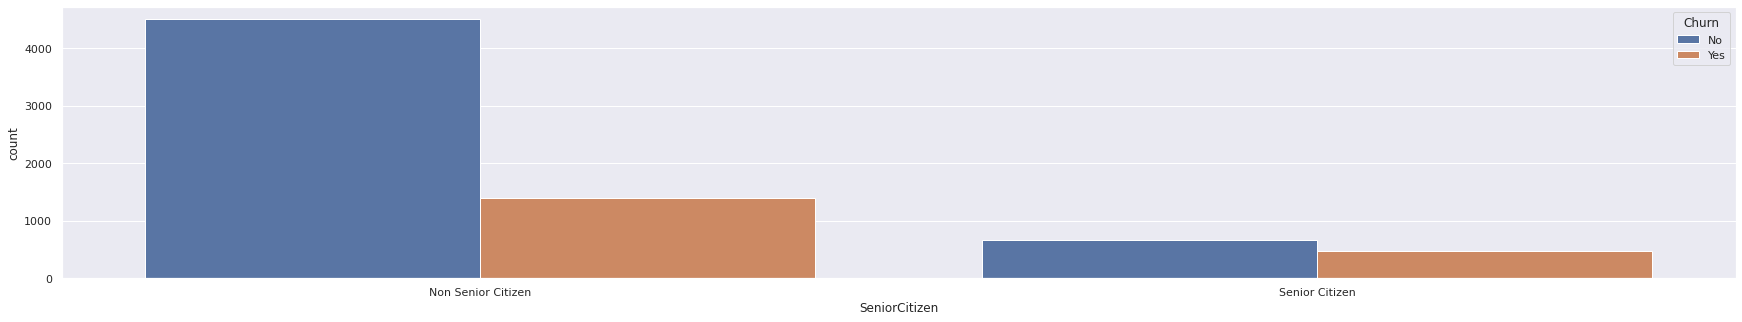

In [14]:
# Changing to better text for visualization 
data_clone['SeniorCitizen'] = data_clone['SeniorCitizen'].replace([0, 1],['Non Senior Citizen','Senior Citizen'])

# Counting the Churn SeniorCitizen ratio from the data
sencount = data_chn['SeniorCitizen'].value_counts()
nsencount = data_nchn['SeniorCitizen'].value_counts()

print(f"Senior customers who stopped using Telco: {round(sencount[1]/(sencount[0]+sencount[1])*100, 0)}%")
print(f"Non-senior customers who stopped using Telco: {round(sencount[0]/(sencount[0]+sencount[1])*100, 0)}%")
print(" ")
print(f"Senior customers who continue using Telco: {round(nsencount[1]/(nsencount[0]+nsencount[1])*100, 0)}%")
print(f"Non-senior customers who continue using Telco: {round(nsencount[0]/(nsencount[0]+nsencount[1])*100, 0)}%")


# Graphing SeniorCitizen count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='SeniorCitizen', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between senior customers and non senior customers. Senior customers have more tendency to churn, hence we can see that age does affect churn rate.

Partnered customers who stopped using Telco: 36.0%
Non-partnered customers who stopped using Telco: 64.0%
 
Partnered customers who continue using Telco: 53.0%
Non-partnered customers who continue using Telco: 47.0%


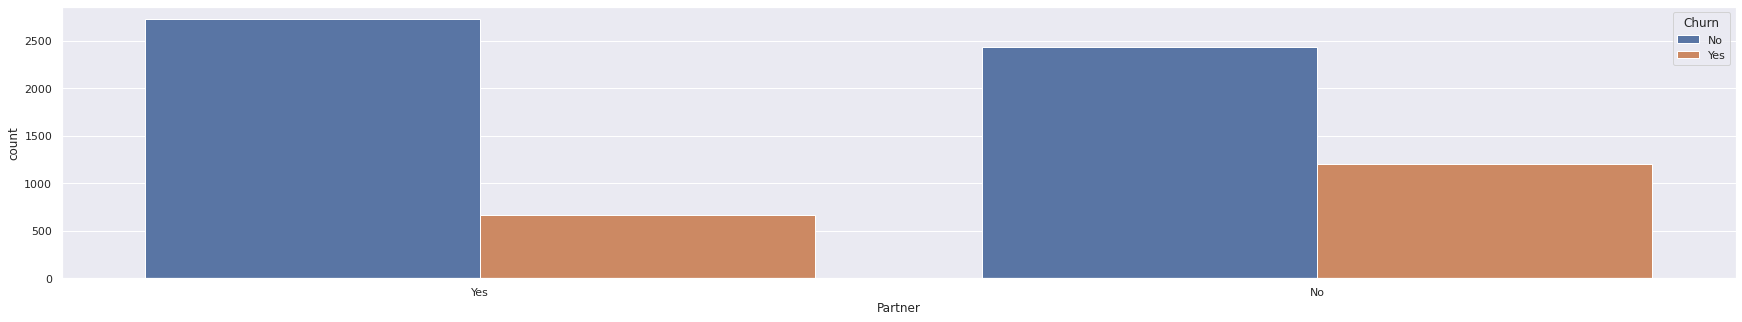

In [15]:
# Counting the Churn Partner ratio from the data
partcount = data_chn['Partner'].value_counts()
npartcount = data_nchn['Partner'].value_counts()

print(f"Partnered customers who stopped using Telco: {round(partcount[1]/(partcount[0]+partcount[1])*100, 0)}%")
print(f"Non-partnered customers who stopped using Telco: {round(partcount[0]/(partcount[0]+partcount[1])*100, 0)}%")
print(" ")
print(f"Partnered customers who continue using Telco: {round(npartcount[0]/(npartcount[0]+npartcount[1])*100, 0)}%")
print(f"Non-partnered customers who continue using Telco: {round(npartcount[1]/(npartcount[0]+npartcount[1])*100, 0)}%")

# Graphing Partner count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='Partner', data=data_clone, hue='Churn')

Customers with dependents who stopped using Telco: 17.0%
Customers with no dependents who stopped using Telco: 83.0%
 
Customers with dependents who continue using Telco: 34.0%
Customers with no dependents who continue using Telco: 66.0%


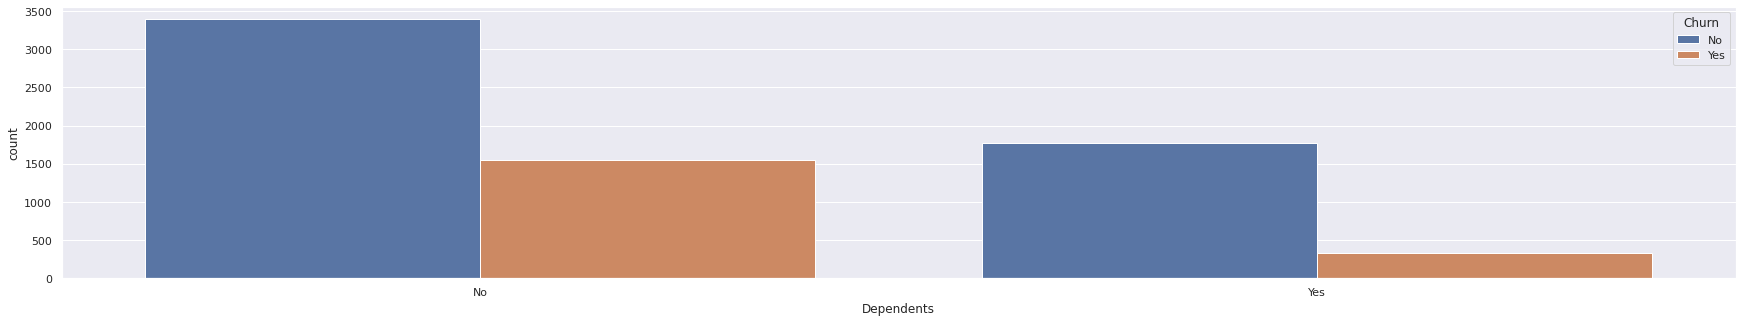

In [16]:
# Counting the Churn Dependents ratio from the data
depcount = data_chn['Dependents'].value_counts()
ndepcount = data_nchn['Dependents'].value_counts()

print(f"Customers with dependents who stopped using Telco: {round(depcount[1]/(depcount[0]+depcount[1])*100, 0)}%")
print(f"Customers with no dependents who stopped using Telco: {round(depcount[0]/(depcount[0]+depcount[1])*100, 0)}%")
print(" ")
print(f"Customers with dependents who continue using Telco: {round(ndepcount[1]/(ndepcount[0]+ndepcount[1])*100, 0)}%")
print(f"Customers with no dependents who continue using Telco: {round(ndepcount[0]/(ndepcount[0]+ndepcount[1])*100, 0)}%")

# Graphing Dependents count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='Dependents', data=data_clone, hue='Churn')

From the two graphs, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with partners or dependents and customers without partners or dependents. Customers without partners or dependents have more tendency to churn, as they do not require telecommunication services as much as customers with partners or dependents. Hence we can see that customers status does affect churn rate.

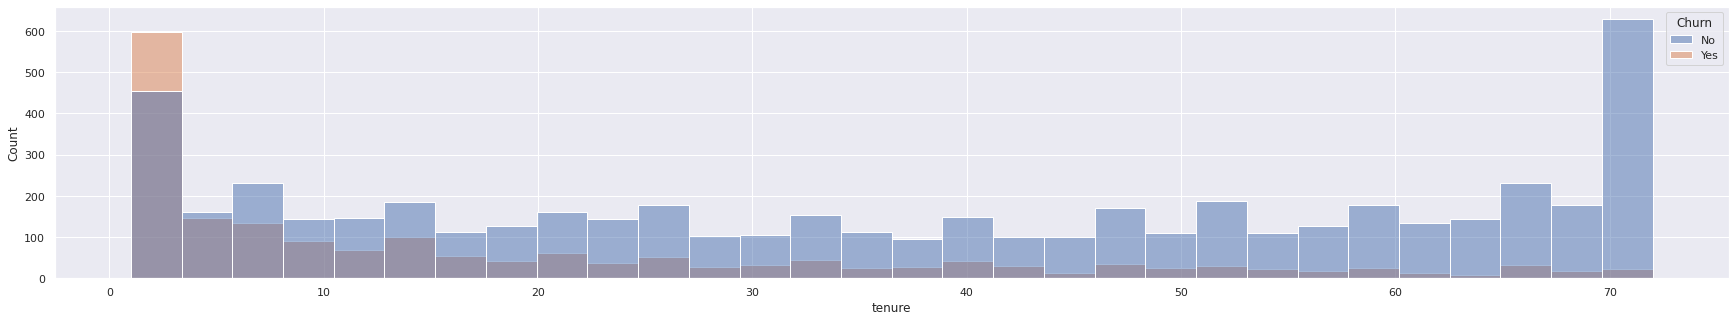

In [17]:
# Graphing tenure count with Churn hue
sns.set(rc={'figure.figsize':(30,5)})
sns.histplot(x='tenure', data=data_clone, bins=30, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between new customers and old customers. New customers have more tendency to churn, hence we can see that tenure does affect churn rate.

Phone service customers who stopped using Telco: 64.0%
Non-phone service customers who stopped using Telco: 36.0%
 
Phone service customers who continue using Telco: 53.0%
Non-phone service customers who continue using Telco: 47.0%


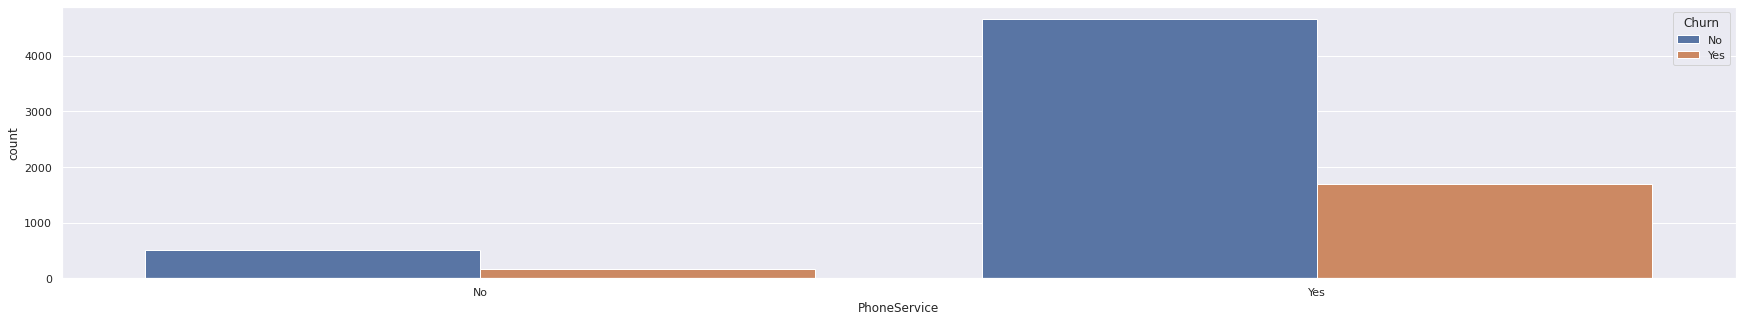

In [18]:
# Counting the Churn PhoneService ratio from the data
phcount = data_chn['PhoneService'].value_counts()
nphcount = data_nchn['PhoneService'].value_counts()

print(f"Phone service customers who stopped using Telco: {round(partcount[0]/(partcount[0]+partcount[1])*100, 0)}%")
print(f"Non-phone service customers who stopped using Telco: {round(partcount[1]/(partcount[0]+partcount[1])*100, 0)}%")
print(" ")
print(f"Phone service customers who continue using Telco: {round(npartcount[0]/(npartcount[0]+npartcount[1])*100, 0)}%")
print(f"Non-phone service customers who continue using Telco: {round(npartcount[1]/(npartcount[0]+npartcount[1])*100, 0)}%")

# Graphing PhoneService count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='PhoneService', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between phone customers and non phone customers. Phone customers have more tendency to churn, which implies that Telco's phone services showed high customer dissatisfaction. Hence we can see that services does affect churn rate.

Multiple lines phone service customers who stopped using Telco: 45.0%
Single line phone service customers who stopped using Telco: 45.0%
Non-phone service customers who stopped using Telco: 9.0%
 
Multiple lines phone service customers who continue using Telco: 41.0%
Single line phone service customers who continue using Telco: 49.0%
Non-phone service customers who continue using Telco: 10.0%


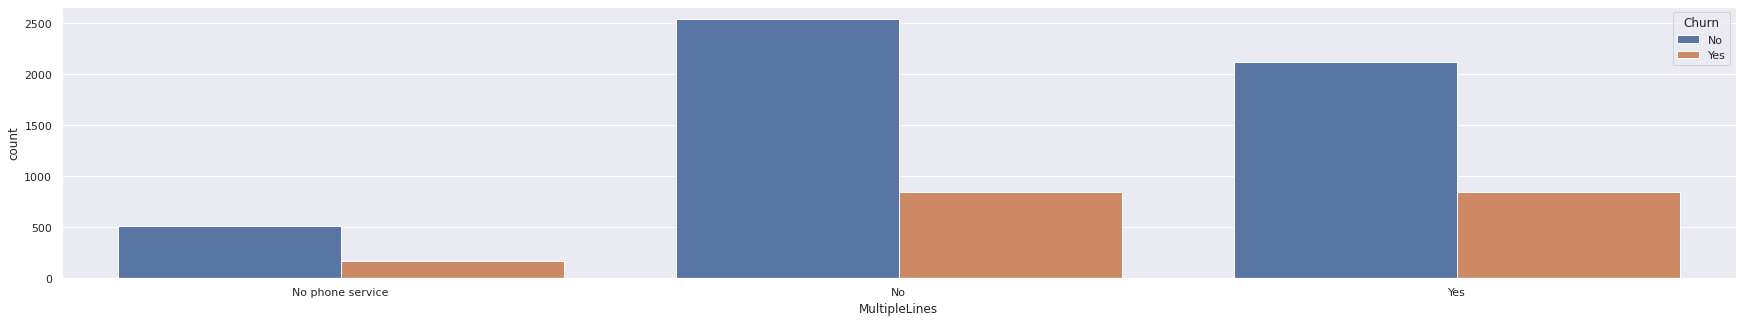

In [19]:
# Counting the Churn MultipleLines ratio from the data
mlcount = data_chn['MultipleLines'].value_counts()
nmlcount = data_nchn['MultipleLines'].value_counts()

print(f"Multiple lines phone service customers who stopped using Telco: {round(mlcount[0]/(mlcount[0]+mlcount[1]+mlcount[2])*100, 0)}%")
print(f"Single line phone service customers who stopped using Telco: {round(mlcount[1]/(mlcount[0]+mlcount[1]+mlcount[2])*100, 0)}%")
print(f"Non-phone service customers who stopped using Telco: {round(mlcount[2]/(mlcount[0]+mlcount[1]+mlcount[2])*100, 0)}%")
print(" ")
print(f"Multiple lines phone service customers who continue using Telco: {round(nmlcount[1]/(nmlcount[0]+nmlcount[1]+nmlcount[2])*100, 0)}%")
print(f"Single line phone service customers who continue using Telco: {round(nmlcount[0]/(nmlcount[0]+nmlcount[1]+nmlcount[2])*100, 0)}%")
print(f"Non-phone service customers who continue using Telco: {round(nmlcount[2]/(nmlcount[0]+nmlcount[1]+nmlcount[2])*100, 0)}%")

# Graphing MultipleLines count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='MultipleLines', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite similar between multiple lines phone customers and non multiple lines phone customers. Hence we can see that multiple lines phone services does affect churn rate.

Fiber optic customers who stopped using Telco: 69.0%
DSL customers who stopped using Telco: 25.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Fiber optic customers who continue using Telco: 35.0%
DSL customers who continue using Telco: 38.0%
Non-internet service customers who continue using Telco: 27.0%


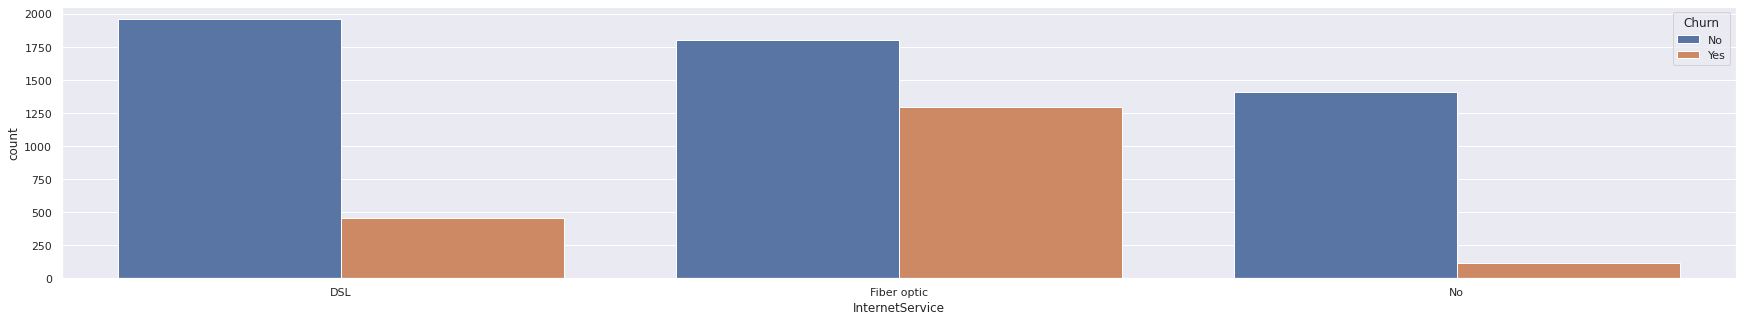

In [20]:
# Counting the Churn InternetService ratio from the data
intercount = data_chn['InternetService'].value_counts()
nintercount = data_nchn['InternetService'].value_counts()

print(f"Fiber optic customers who stopped using Telco: {round(intercount[0]/(intercount[0]+intercount[1]+intercount[2])*100, 0)}%")
print(f"DSL customers who stopped using Telco: {round(intercount[1]/(intercount[0]+intercount[1]+intercount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(intercount[2]/(intercount[0]+intercount[1]+intercount[2])*100, 0)}%")
print(" ")
print(f"Fiber optic customers who continue using Telco: {round(nintercount[1]/(nintercount[0]+nintercount[1]+nintercount[2])*100, 0)}%")
print(f"DSL customers who continue using Telco: {round(nintercount[0]/(nintercount[0]+nintercount[1]+nintercount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(nintercount[2]/(nintercount[0]+nintercount[1]+nintercount[2])*100, 0)}%")

# Graphing InternetService count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='InternetService', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with different internet services. Customers with fiber optics internet have more tendency to churn, unlike customers with DSL internet. This implies a problem in fiber optics internet service from Telco, hence we can see that internet services does affect churn rate.

Online security customers who stopped using Telco: 16.0%
Non-online security who stopped using Telco: 78.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Online security customers who continue using Telco: 33.0%
Non-online security customers who continue using Telco: 39.0%
Non-internet service customers who continue using Telco: 27.0%


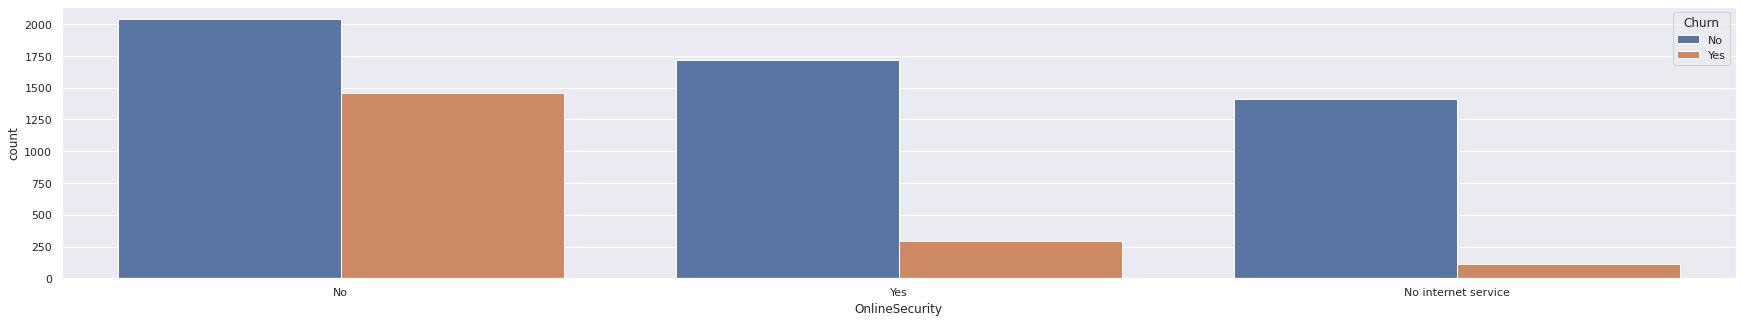

In [21]:
# Counting the Churn OnlineSecurity ratio from the data
onseccount = data_chn['OnlineSecurity'].value_counts()
nonseccount = data_nchn['OnlineSecurity'].value_counts()

print(f"Online security customers who stopped using Telco: {round(onseccount[1]/(onseccount[0]+onseccount[1]+onseccount[2])*100, 0)}%")
print(f"Non-online security who stopped using Telco: {round(onseccount[0]/(onseccount[0]+onseccount[1]+onseccount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(onseccount[2]/(onseccount[0]+onseccount[1]+onseccount[2])*100, 0)}%")
print(" ")
print(f"Online security customers who continue using Telco: {round(nonseccount[1]/(nonseccount[0]+nonseccount[1]+nonseccount[2])*100, 0)}%")
print(f"Non-online security customers who continue using Telco: {round(nonseccount[0]/(nonseccount[0]+nonseccount[1]+nonseccount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(nonseccount[2]/(nonseccount[0]+nonseccount[1]+nonseccount[2])*100, 0)}%")

# Graphing OnlineSecurity count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='OnlineSecurity', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with and without online security. Customers without online security have more tendency to churn, unlike customers with online security. Hence we can see that the lack of online security services does affect churn rate.

Online backup customers who stopped using Telco: 28.0%
Non-online backup who stopped using Telco: 66.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Online backup customers who continue using Telco: 37.0%
Non-online backup customers who continue using Telco: 36.0%
Non-internet service customers who continue using Telco: 27.0%


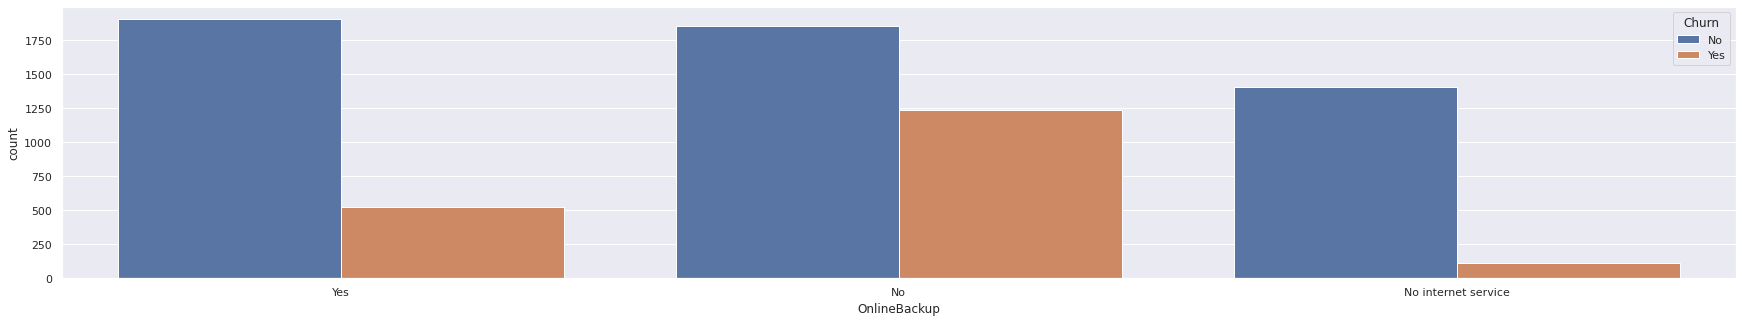

In [22]:
# Counting the Churn OnlineBackup ratio from the data
onbackcount = data_chn['OnlineBackup'].value_counts()
nonbackcount = data_nchn['OnlineBackup'].value_counts()

print(f"Online backup customers who stopped using Telco: {round(onbackcount[1]/(onbackcount[0]+onbackcount[1]+onbackcount[2])*100, 0)}%")
print(f"Non-online backup who stopped using Telco: {round(onbackcount[0]/(onbackcount[0]+onbackcount[1]+onbackcount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(onbackcount[2]/(onbackcount[0]+onbackcount[1]+onbackcount[2])*100, 0)}%")
print(" ")
print(f"Online backup customers who continue using Telco: {round(nonbackcount[0]/(nonbackcount[0]+nonbackcount[1]+nonbackcount[2])*100, 0)}%")
print(f"Non-online backup customers who continue using Telco: {round(nonbackcount[1]/(nonbackcount[0]+nonbackcount[1]+nonbackcount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(nonbackcount[2]/(nonbackcount[0]+nonbackcount[1]+nonbackcount[2])*100, 0)}%")

# Graphing OnlineBackup count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='OnlineBackup', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with and without online backup services. Customers without online backup service have more tendency to churn, unlike customers with online backup services. Hence we can see that the lack of online backup services does affect churn rate.

Customers with device protection who stopped using Telco: 29.0%
Customers without device protection who stopped using Telco: 65.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Customers with device protection who continue using Telco: 36.0%
Customers without device protection who continue using Telco: 36.0%
Non-internet service customers who continue using Telco: 27.0%


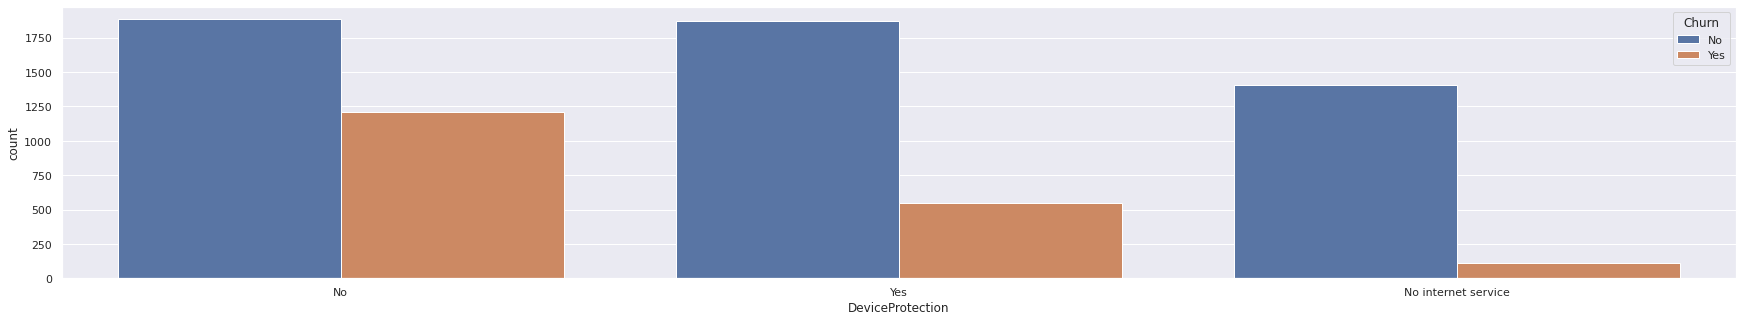

In [23]:
# Counting the Churn DeviceProtection ratio from the data
devprotcount = data_chn['DeviceProtection'].value_counts()
ndevprotcount = data_nchn['DeviceProtection'].value_counts()

print(f"Customers with device protection who stopped using Telco: {round(devprotcount[1]/(devprotcount[0]+devprotcount[1]+devprotcount[2])*100, 0)}%")
print(f"Customers without device protection who stopped using Telco: {round(devprotcount[0]/(devprotcount[0]+devprotcount[1]+devprotcount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(devprotcount[2]/(devprotcount[0]+devprotcount[1]+devprotcount[2])*100, 0)}%")
print(" ")
print(f"Customers with device protection who continue using Telco: {round(ndevprotcount[0]/(ndevprotcount[0]+ndevprotcount[1]+ndevprotcount[2])*100, 0)}%")
print(f"Customers without device protection who continue using Telco: {round(ndevprotcount[1]/(ndevprotcount[0]+ndevprotcount[1]+ndevprotcount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(ndevprotcount[2]/(ndevprotcount[0]+ndevprotcount[1]+ndevprotcount[2])*100, 0)}%")

# Graphing DeviceProtection count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='DeviceProtection', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with and without device protection. Customers without device protection have more tendency to churn, unlike customers with device protection. Hence we can see that the lack of device protection services does affect churn rate.

Customers with tech support who stopped using Telco: 17.0%
Customers without tech support who stopped using Telco: 77.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Customers with tech support who continue using Telco: 39.0%
Customers without tech support who continue using Telco: 34.0%
Non-internet service customers who continue using Telco: 27.0%


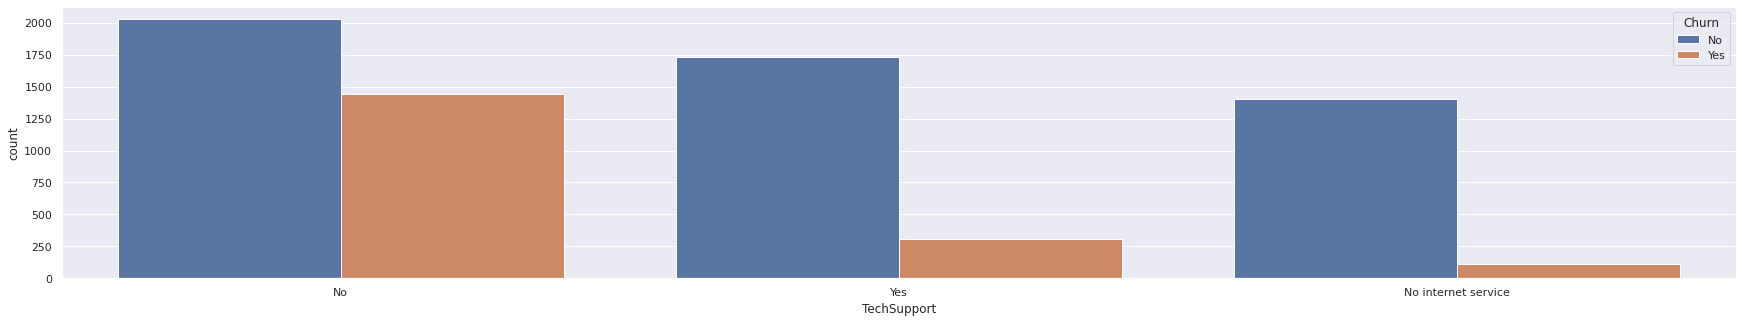

In [24]:
# Counting the Churn TechSupport ratio from the data
techsupcount = data_chn['TechSupport'].value_counts()
ntechsupcount = data_nchn['TechSupport'].value_counts()

print(f"Customers with tech support who stopped using Telco: {round(techsupcount[1]/(techsupcount[0]+techsupcount[1]+techsupcount[2])*100, 0)}%")
print(f"Customers without tech support who stopped using Telco: {round(techsupcount[0]/(techsupcount[0]+techsupcount[1]+techsupcount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(techsupcount[2]/(techsupcount[0]+techsupcount[1]+techsupcount[2])*100, 0)}%")
print(" ")
print(f"Customers with tech support who continue using Telco: {round(ntechsupcount[0]/(ntechsupcount[0]+ntechsupcount[1]+ntechsupcount[2])*100, 0)}%")
print(f"Customers without tech support who continue using Telco: {round(ntechsupcount[1]/(ntechsupcount[0]+ntechsupcount[1]+ntechsupcount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(ntechsupcount[2]/(ntechsupcount[0]+ntechsupcount[1]+ntechsupcount[2])*100, 0)}%")

# Graphing TechSupport count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='TechSupport', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite different between customers with and without tech support services. Customers without tech support services have more tendency to churn, unlike customers with tech support services. Hence we can see that the lack of online backup service services does affect churn rate.

Customers with TV streaming who stopped using Telco: 44.0%
Customers without TV streaming who stopped using Telco: 50.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Customers with TV streaming who continue using Telco: 37.0%
Customers without TV streaming who continue using Telco: 36.0%
Non-internet service customers who continue using Telco: 27.0%


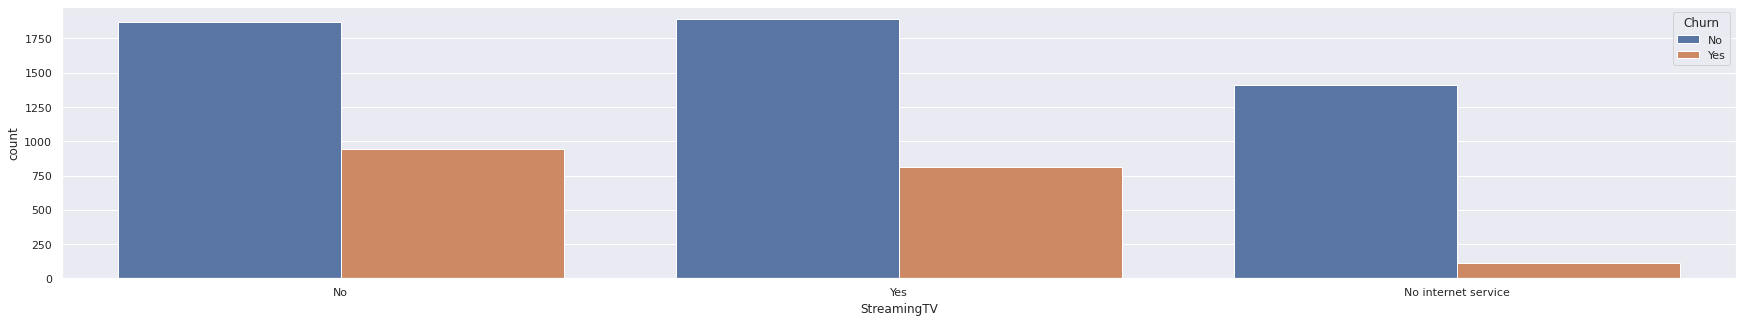

In [25]:
# Counting the Churn StreamingTV ratio from the data
tvstreamcount = data_chn['StreamingTV'].value_counts()
ntvstreamcount = data_nchn['StreamingTV'].value_counts()

print(f"Customers with TV streaming who stopped using Telco: {round(tvstreamcount[1]/(tvstreamcount[0]+tvstreamcount[1]+tvstreamcount[2])*100, 0)}%")
print(f"Customers without TV streaming who stopped using Telco: {round(tvstreamcount[0]/(tvstreamcount[0]+tvstreamcount[1]+tvstreamcount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(tvstreamcount[2]/(tvstreamcount[0]+tvstreamcount[1]+tvstreamcount[2])*100, 0)}%")
print(" ")
print(f"Customers with TV streaming who continue using Telco: {round(ntvstreamcount[0]/(ntvstreamcount[0]+ntvstreamcount[1]+ntvstreamcount[2])*100, 0)}%")
print(f"Customers without TV streaming who continue using Telco: {round(ntvstreamcount[1]/(ntvstreamcount[0]+ntvstreamcount[1]+ntvstreamcount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(ntvstreamcount[2]/(ntvstreamcount[0]+ntvstreamcount[1]+ntvstreamcount[2])*100, 0)}%")

# Graphing StreamingTV count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='StreamingTV', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite similar between customers with and without TV streaming services. Hence we can see that TV streaming services does not affect churn rate.

Customers with movies streaming who stopped using Telco: 44.0%
Customers without movies streaming who stopped using Telco: 50.0%
Non-internet service customers who stopped using Telco: 6.0%
 
Customers with movies streaming who continue using Telco: 37.0%
Customers without movies streaming who continue using Telco: 36.0%
Non-internet service customers who continue using Telco: 27.0%


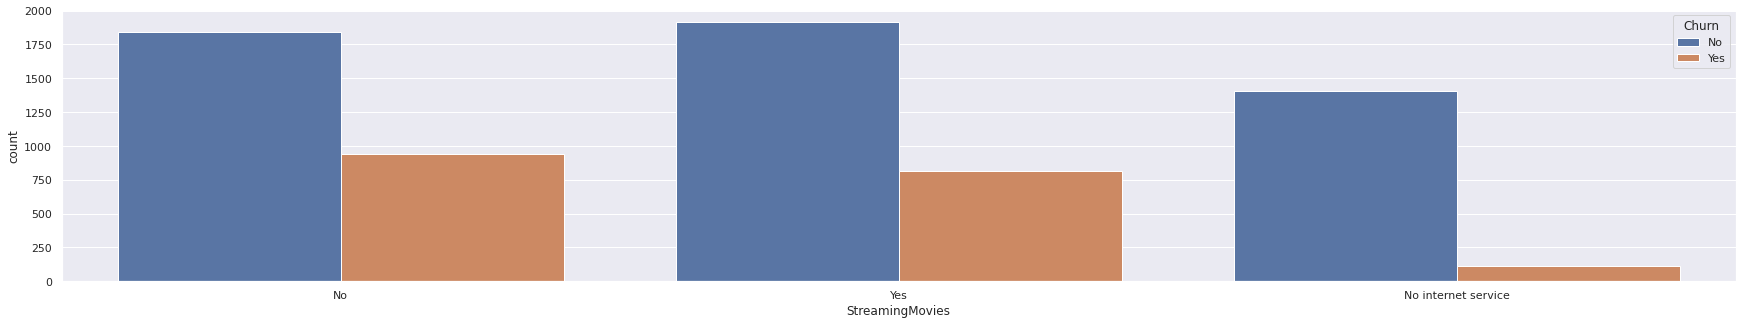

In [26]:
# Counting the Churn StreamingMovies ratio from the data
movstreamcount = data_chn['StreamingMovies'].value_counts()
nmovstreamcount = data_nchn['StreamingMovies'].value_counts()

print(f"Customers with movies streaming who stopped using Telco: {round(movstreamcount[1]/(movstreamcount[0]+movstreamcount[1]+movstreamcount[2])*100, 0)}%")
print(f"Customers without movies streaming who stopped using Telco: {round(movstreamcount[0]/(movstreamcount[0]+movstreamcount[1]+movstreamcount[2])*100, 0)}%")
print(f"Non-internet service customers who stopped using Telco: {round(movstreamcount[2]/(movstreamcount[0]+movstreamcount[1]+movstreamcount[2])*100, 0)}%")
print(" ")
print(f"Customers with movies streaming who continue using Telco: {round(nmovstreamcount[0]/(nmovstreamcount[0]+nmovstreamcount[1]+nmovstreamcount[2])*100, 0)}%")
print(f"Customers without movies streaming who continue using Telco: {round(nmovstreamcount[1]/(nmovstreamcount[0]+nmovstreamcount[1]+nmovstreamcount[2])*100, 0)}%")
print(f"Non-internet service customers who continue using Telco: {round(nmovstreamcount[2]/(nmovstreamcount[0]+nmovstreamcount[1]+nmovstreamcount[2])*100, 0)}%")

# Graphing StreamingMovies count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='StreamingMovies', data=data_clone, hue='Churn')

From the graph, we can see that the ratio of the customers from the data between those who continue and stopped using Telco's product or service during a certain time frame is quite similar between customers with and without movies streaming services. Hence we can see that movies streaming services does not affect churn rate.

Customers with month to month contract who stopped using Telco: 89.0%
Customers with one year contract who stopped using Telco: 9.0%
Customers with two year contract who stopped using Telco: 3.0%
 
Customers with month to month contract who continue using Telco: 43.0%
Customers with one year contract who continue using Telco: 25.0%
Customers with two year contract who continue using Telco: 32.0%


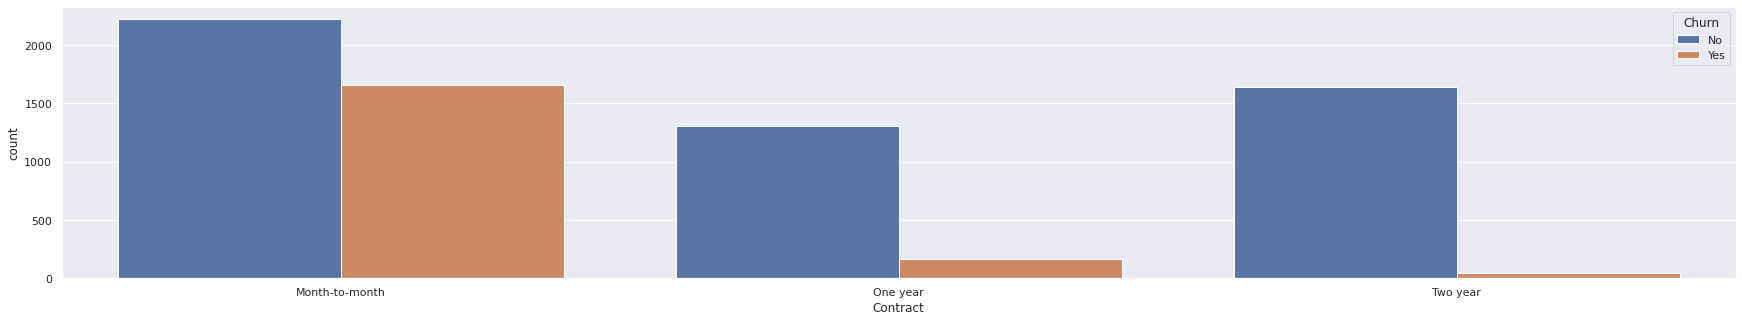

In [27]:
# Counting the Churn Contract ratio from the data
contcount = data_chn['Contract'].value_counts()
ncontcount = data_nchn['Contract'].value_counts()

print(f"Customers with month to month contract who stopped using Telco: {round(contcount[0]/(contcount[0]+contcount[1]+contcount[2])*100, 0)}%")
print(f"Customers with one year contract who stopped using Telco: {round(contcount[1]/(contcount[0]+contcount[1]+contcount[2])*100, 0)}%")
print(f"Customers with two year contract who stopped using Telco: {round(contcount[2]/(contcount[0]+contcount[1]+contcount[2])*100, 0)}%")
print(" ")
print(f"Customers with month to month contract who continue using Telco: {round(ncontcount[0]/(ncontcount[0]+ncontcount[1]+ncontcount[2])*100, 0)}%")
print(f"Customers with one year contract who continue using Telco: {round(ncontcount[2]/(ncontcount[0]+ncontcount[1]+ncontcount[2])*100, 0)}%")
print(f"Customers with two year contract who continue using Telco: {round(ncontcount[1]/(ncontcount[0]+ncontcount[1]+ncontcount[2])*100, 0)}%")

# Graphing Contract count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='Contract', data=data_clone, hue='Churn')

From the graph, we can see that the longer the customers contract is, the less tendency they have to churn. This shows that customers with longer contracts show more commitment and loyalty, while those on shorter contract might just want to try the services or less commitment to Telco.

Paperless customers who stopped using Telco: 75.0%
Non-paperless customers who stopped using Telco: 25.0%
 
Paperless customers who continue using Telco: 54.0%
Non-paperless customers who continue using Telco: 46.0%


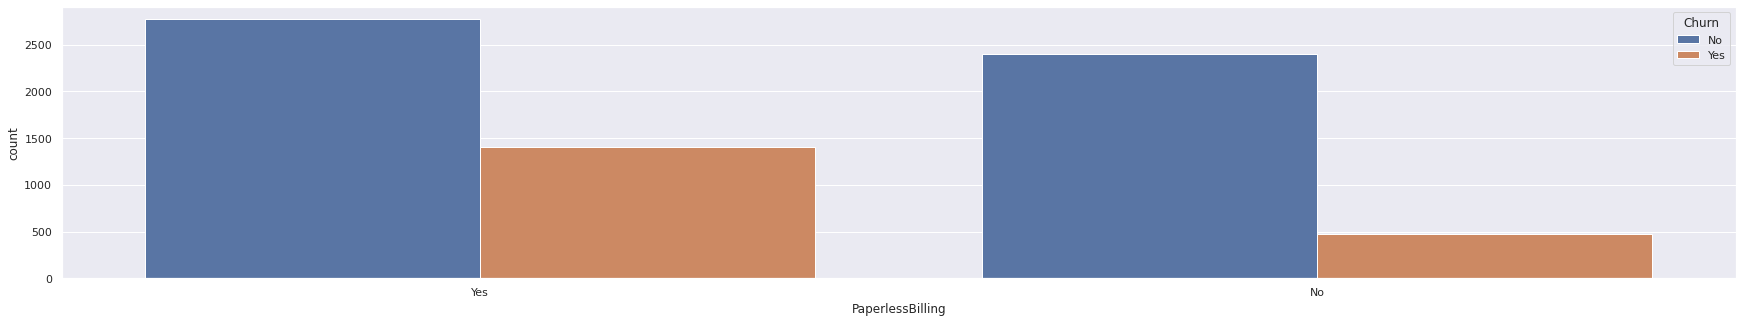

In [28]:
# Counting the Churn PaperlessBilling ratio from the data
billcount = data_chn['PaperlessBilling'].value_counts()
nbillcount = data_nchn['PaperlessBilling'].value_counts()

print(f"Paperless customers who stopped using Telco: {round(billcount[0]/(billcount[0]+billcount[1])*100, 0)}%")
print(f"Non-paperless customers who stopped using Telco: {round(billcount[1]/(billcount[0]+billcount[1])*100, 0)}%")
print(" ")
print(f"Paperless customers who continue using Telco: {round(nbillcount[0]/(nbillcount[0]+nbillcount[1])*100, 0)}%")
print(f"Non-paperless customers who continue using Telco: {round(nbillcount[1]/(nbillcount[0]+nbillcount[1])*100, 0)}%")

# Graphing PaperlessBilling count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='PaperlessBilling', data=data_clone, hue='Churn')

From the graph, we can see that there are more tendency to churn on customers with paperless bill.

Electronic check customers who stopped using Telco: 57.0%
Mailed check customers who stopped using Telco: 16.0%
Bank transfer (automatic) check customers who stopped using Telco: 14.0%
Credit card (automatic) check customers who stopped using Telco: 12.0%
 
Electronic check customers who continue using Telco: 25.0%
Mailed check customers who continue using Telco: 25.0%
Bank transfer (automatic) check customers who continue using Telco: 25.0%
Credit card (automatic) check customers who continue using Telco: 25.0%


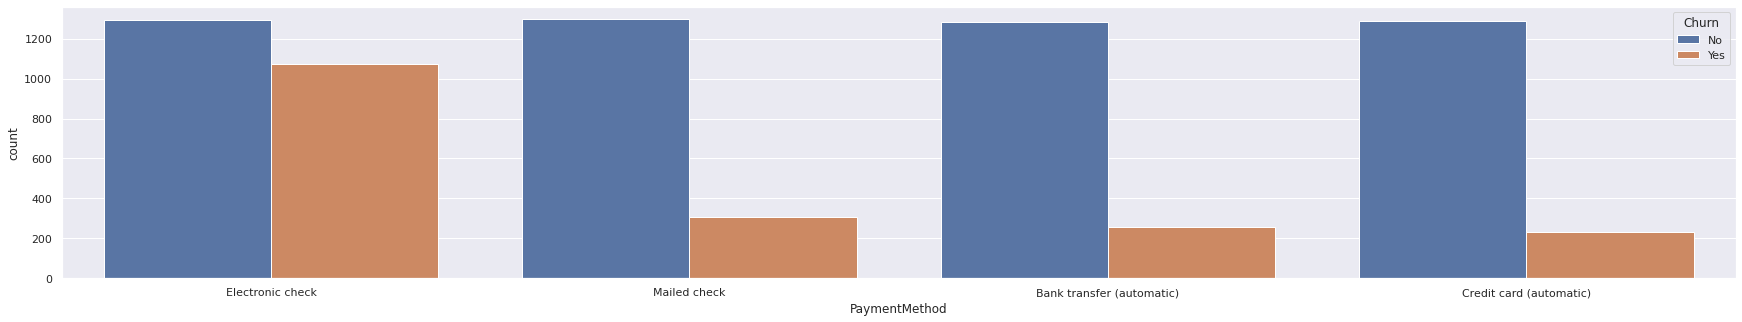

In [29]:
# Counting the Churn PaymentMethod ratio from the data
paymetcount = data_chn['PaymentMethod'].value_counts()
npaymetcount = data_nchn['PaymentMethod'].value_counts()

print(f"Electronic check customers who stopped using Telco: {round(paymetcount[0]/(paymetcount[0]+paymetcount[1]+paymetcount[2]+paymetcount[3])*100, 0)}%")
print(f"Mailed check customers who stopped using Telco: {round(paymetcount[1]/(paymetcount[0]+paymetcount[1]+paymetcount[2]+paymetcount[3])*100, 0)}%")
print(f"Bank transfer (automatic) check customers who stopped using Telco: {round(paymetcount[2]/(paymetcount[0]+paymetcount[1]+paymetcount[2]+paymetcount[3])*100, 0)}%")
print(f"Credit card (automatic) check customers who stopped using Telco: {round(paymetcount[3]/(paymetcount[0]+paymetcount[1]+paymetcount[2]+paymetcount[3])*100, 0)}%")
print(" ")
print(f"Electronic check customers who continue using Telco: {round(npaymetcount[1]/(npaymetcount[0]+npaymetcount[1]+npaymetcount[2]+npaymetcount[3])*100, 0)}%")
print(f"Mailed check customers who continue using Telco: {round(npaymetcount[0]/(npaymetcount[0]+npaymetcount[1]+npaymetcount[2]+npaymetcount[3])*100, 0)}%")
print(f"Bank transfer (automatic) check customers who continue using Telco: {round(npaymetcount[3]/(npaymetcount[0]+npaymetcount[1]+npaymetcount[2]+npaymetcount[3])*100, 0)}%")
print(f"Credit card (automatic) check customers who continue using Telco: {round(npaymetcount[2]/(npaymetcount[0]+npaymetcount[1]+npaymetcount[2]+npaymetcount[3])*100, 0)}%")

# Graphing PaymentMethod count based on Churn
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='PaymentMethod', data=data_clone, hue='Churn')

From the graph, we can see that although the ratio for continuing customers are similar between each payment methods, there are more tendency to churn on customers with electronic check compared to other payment methods. This could implies a problem in electronic check payment.

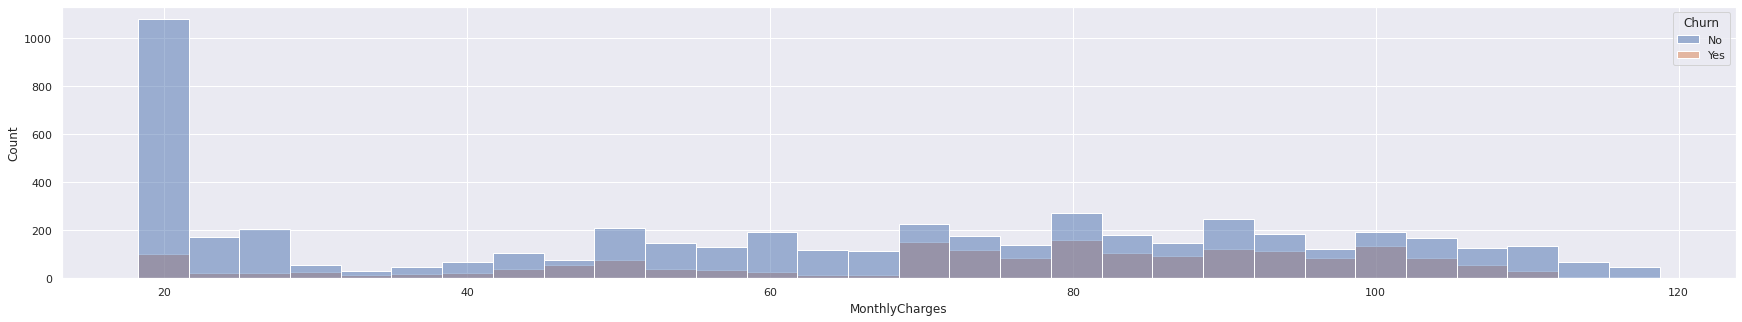

In [30]:
# Graphing MonthlyCharges count with Churn hue
sns.set(rc={'figure.figsize':(30,5)})
sns.histplot(x='MonthlyCharges', data=data_clone, bins=30, hue='Churn')

From the graph, we can see that there are not much difference in monthly payments between those who continue and stopped using Telco's product or service during a certain time frame.

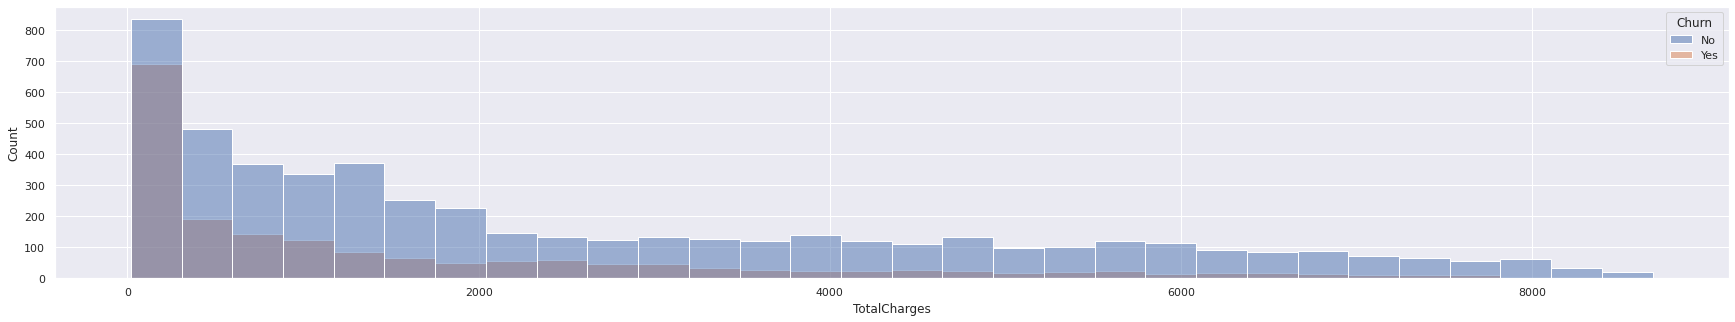

In [31]:
# Graphing TotalCharges count with Churn hue
sns.set(rc={'figure.figsize':(30,5)})
sns.histplot(x='TotalCharges', data=data_clone, bins=30, hue='Churn')

From the graph, we can see that there are not much difference in total payments between those who continue and stopped using Telco's product or service during a certain time frame.

From the exploratory data analysis (EDA) we found out that:
- a quarter of the customers from the data are stopped using Telco's product or service during a certain time frame.
- Senior customers have more tendency to churn, hence we can see that age does affect churn rate.
- Customers without partners or dependents have more tendency to churn, as they do not require telecommunication services as much as customers with partners or dependents. 
- Phone customers have more tendency to churn, which implies that Telco's phone services showed high customer dissatisfaction.
- Customers with fiber optics internet have more tendency to churn, unlike customers with DSL internet. This implies a problem in fiber optics internet service from Telco.
- Internet customers without online security, online backup, device protection, and tech support services have more tendency to churn.
- TV and movies streaming services in internet customers does not affect customers tendency to churn.
- Customers with longer tenure and contracts show more commitment and loyalty, as shown by the less churn tendency the longer they became Telco's customers.
- From the graph, we can see that there are more tendency to churn on customers with paperless bill and on customers with electronic check compared to other payment methods. This could implies a problem in electronic check payment system or e-billing system.
- There are not much difference in monthly payments between customers who continue and stopped using Telco's product or service during a certain time frame.

# V. Data Preprocessing

### Featured Selection

In [32]:
# Dropping unnecessary columns and changing values for easier calculation
data = data.drop('customerID', axis=1)
data['SeniorCitizen'] = data['SeniorCitizen'].replace([0, 1],['No','Yes'])
data['Churn'] = data['Churn'].replace(['No','Yes'], [0, 1])

For this case, since I have removed the missing values beforehand in the data loading section, I decided to not process missing value again. Additionally, I choose not to handle outliers in this case to see the model as accurately as possible.

### Get Inference Data

In [33]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=9)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1888,Female,No,No,No,23,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),55.80,1327.85,0
5398,Male,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,39.30,0
2622,Male,Yes,Yes,Yes,28,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic check,51.00,1381.80,0
531,Male,No,Yes,Yes,70,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,1360.25,0
1472,Male,No,Yes,Yes,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,1
2035,Female,No,No,Yes,43,Yes,No,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,63.95,2737.05,0
4838,Female,No,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45,0
5505,Female,No,Yes,Yes,12,No,No phone service,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic),30.25,368.85,0
3528,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.70,342.40,1
3279,Male,No,Yes,Yes,23,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),57.20,1423.35,0


In [34]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [35]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7018,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7019,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7020,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


### Splitting Dataset

In [36]:
# Splitting dataset into x and y
x = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [37]:
# Splitting dataset into training, validation, and testing
x_train_full, x_test,  y_train_full, y_test = train_test_split(x,
                                                               y,
                                                               shuffle=True, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (4493, 19)
Validation data shape: (1124, 19)
Testing data shape: (1405, 19)


### Split between Numerical Columns and Categorical Columns

In [38]:
# Decide numericals and categoricals columns
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Feature Scaling & Encoding

In [39]:
# Create pipeline for numerical columns
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [40]:
# Create pipeline for categorical columns
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

### Concate between Ordinal Columns and Nominal Columns

In [41]:
# Combine pipelines
preproc_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("categories", cat_pipeline, cat_features),
    ], verbose=True)

In [42]:
# Fit pipeline to data
x_train = preproc_pipeline.fit_transform(x_train)
x_test = preproc_pipeline.transform(x_test)
x_val = preproc_pipeline.transform(x_val)

[ColumnTransformer] ....... (1 of 2) Processing numbers, total=   0.0s
[ColumnTransformer] .... (2 of 2) Processing categories, total=   0.0s


### Input Pipeline

In [43]:
# Creating tf dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(32)

# VI. Model Definition

### Sequential API

In [44]:
# Define the sequential model
sqt_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the sequential model
sqt_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

### Functional API

In [45]:
# Define the functional model
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation='sigmoid')(concat)
fcn_model = keras.models.Model(inputs=[input_], outputs=[output])

# Compile the functional model
fcn_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

# VII. Model Training

### Sequential API

In [46]:
# Training the data with sequential model
history_sqt = sqt_model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
141/141 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7734 - val_loss: 0.4234 - val_accuracy: 0.8016
Epoch 2/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8010 - val_loss: 0.4181 - val_accuracy: 0.7936
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8041 - val_loss: 0.4148 - val_accuracy: 0.7927
Epoch 4/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8059 - val_loss: 0.4193 - val_accuracy: 0.7909
Epoch 5/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8075 - val_loss: 0.4262 - val_accuracy: 0.7927
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8079 - val_loss: 0.4182 - val_accuracy: 0.7883
Epoch 7/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8097 - val_loss: 0.4112 - val_accuracy: 0.7954
Epoch 

### Functional API

In [47]:
# Training the data with functional model
history_fcn = fcn_model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
141/141 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7592 - val_loss: 0.4342 - val_accuracy: 0.7758
Epoch 2/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8044 - val_loss: 0.4218 - val_accuracy: 0.7838
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8057 - val_loss: 0.4168 - val_accuracy: 0.7945
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8097 - val_loss: 0.4138 - val_accuracy: 0.7918
Epoch 5/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8110 - val_loss: 0.4199 - val_accuracy: 0.7954
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8115 - val_loss: 0.4157 - val_accuracy: 0.7945
Epoch 7/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8113 - val_loss: 0.4127 - val_accuracy: 0.7954
Epoch 

# VIII. Model Evaluation

### Sequential API

<function matplotlib.pyplot.show(*args, **kw)>

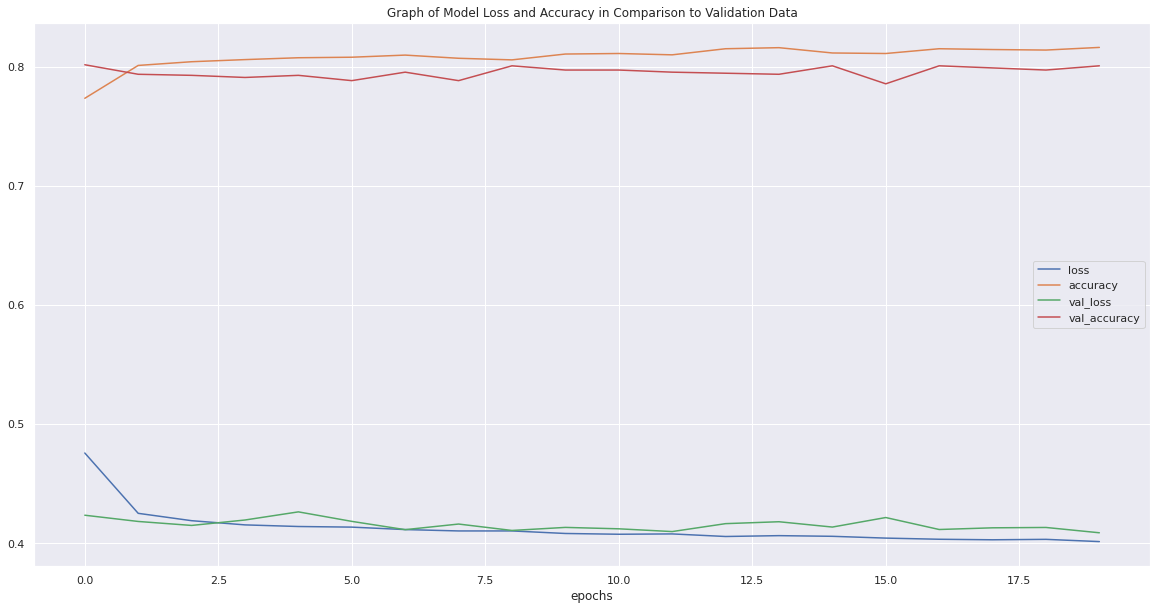

In [48]:
# Graph loss and accuracy of the model based on epochs
metrics = pd.DataFrame(history_sqt.history)
metrics.plot(figsize=(20, 10))
plt.title("Graph of Model Loss and Accuracy in Comparison to Validation Data")
plt.xlabel('epochs')
plt.show

From the result of the accuracy graph, we can see that for both the train data and the validation data, accuracy went up as epochs value increase, while the loss went down as epochs value increase. This show a very positive result for our model.

Despite that, we can also see that between the value of train data and the validation data there are significant difference. Since the train data is performing better than the validation data, the model is overfitted, although the difference for this overfitted model is not that big.

In [49]:
# Measure model evaluate
sqt_model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 881us/step - loss: 0.4247 - accuracy: 0.8021


[0.4246758818626404, 0.8021352291107178]

In [50]:
# Calculate y_pred value for sequential API and append into list
y_pred = sqt_model.predict(x_test)
y_pred_actual_sqt = []

for ele in y_pred:
  if ele > 0.5:
    y_pred_actual_sqt.append(1)
  else :
    y_pred_actual_sqt.append(0)


44/44 [==============================] - 0s 902us/step


Text(57.5, 0.5, 'Actual')

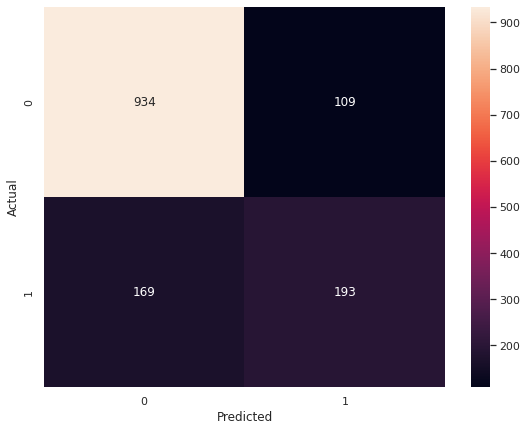

In [51]:
# Graph Confusion Matrix
cm_sqt = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_actual_sqt)

plt.figure(figsize=(9,7))
sns.heatmap(cm_sqt,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [52]:
# Define confusion matrix result into int value

TP_cm_sqt = int(cm_sqt[0,0])
FP_cm_sqt = int(cm_sqt[0,1])
FN_cm_sqt = int(cm_sqt[1,0])
TN_cm_sqt = int(cm_sqt[1,1])

In [53]:
# Print accuracy from confusion matrix
calc = (TP_cm_sqt+TN_cm_sqt)/(TP_cm_sqt+FP_cm_sqt+FN_cm_sqt+TN_cm_sqt)
print(f"Accuracy from confusion matrix")
print(f"{round(calc*100, 1)}%")

Accuracy from confusion matrix
80.2%


In [54]:
# Print recall for those who churn from confusion matrix
calc = (TN_cm_sqt)/(FP_cm_sqt+TN_cm_sqt)
print(f"Recall for those who churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who churn from confusion matrix
63.9%


In [55]:
# Print recall for those who did not churn from confusion matrix
calc = (TP_cm_sqt)/(TP_cm_sqt+FN_cm_sqt)
print(f"Recall for those who did not churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who did not churn from confusion matrix
84.7%


In [56]:
# Make classification report for sequential API

print("Classification Reports is:\n",classification_report(y_test,y_pred_actual_sqt))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1043
           1       0.64      0.53      0.58       362

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.73      1405
weighted avg       0.79      0.80      0.80      1405



We can see that the accuracy value for this model based on the model evaluation is 80.2%. Similarly, the accuracy value for this model based on the confusion matrix is also 80.2%. Meanwhile, the accuracy of for this model based on the classification report is 80%. From these three, we can conclude that the accuracy is around 80% for this model.

For those who churn, the recall from confusion matrix is 63.9% while the recall from the classification report is 53%, which shows a quite difference between the two data. 

For those who did not churn, the recall from confusion matrix is 84.7% while the recall from the classification report is 90%, which also shows a quite difference between the two data. 

Overall, this model is a bit overfitted, although the model seems to be working alright in terms of accuracy of prediction. The recall for those who did not churn seems to be quite far and the recall for those who churn is even further in difference. 

### Functional API

<function matplotlib.pyplot.show(*args, **kw)>

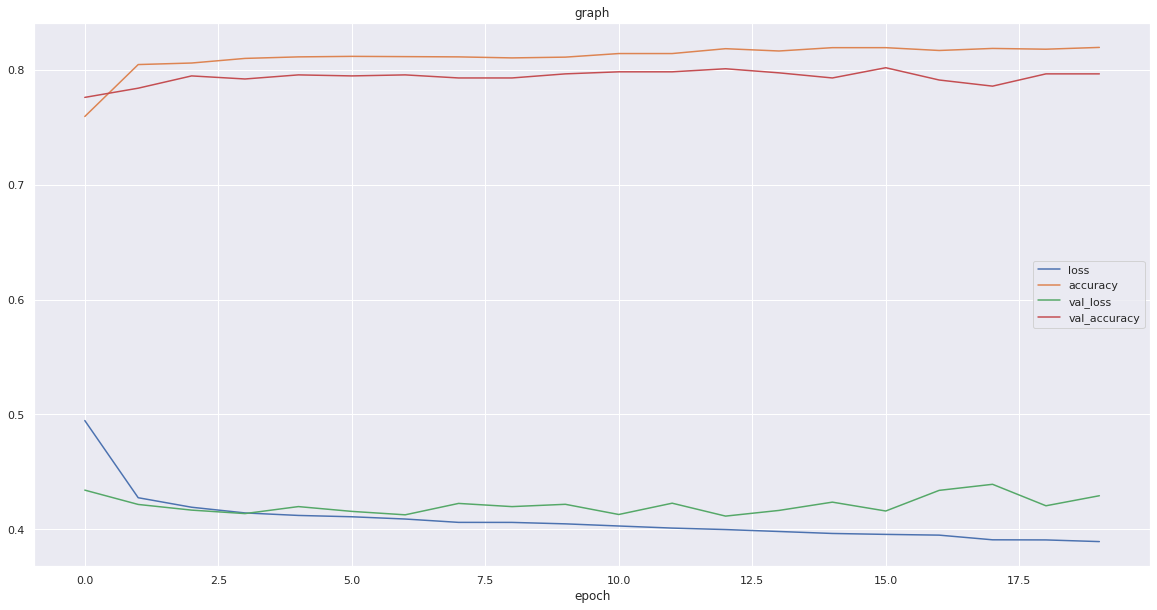

In [57]:
# Graph loss and accuracy of the model based on epochs
metrics = pd.DataFrame(history_fcn.history)
metrics.plot(figsize=(20, 10))
plt.title("graph")
plt.xlabel('epoch')
plt.show

From the result of the accuracy graph, we can see that for both the train data and the validation data, accuracy went up as epochs value increase, while the loss went down as epochs value increase. This show a very positive result for our model.

Despite that, we can also see that between the value of train data and the validation data there are significant difference. Since the train data is performing better than the validation data, the model is overfitted, and the difference for this overfitted model is quite significant.

In [58]:
# Measure model evaluate for functional API
fcn_model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 856us/step - loss: 0.4496 - accuracy: 0.7779


[0.4495641887187958, 0.7779359221458435]

In [59]:
# Calculate y_pred value for functional API and append into list
y_pred_fcn = fcn_model.predict(x_test)
y_pred_actual_fcn = []

for ele in y_pred:
  if ele > 0.5:
    y_pred_actual_fcn.append(1)
  else :
    y_pred_actual_fcn.append(0)

44/44 [==============================] - 0s 896us/step


Text(57.5, 0.5, 'Actual')

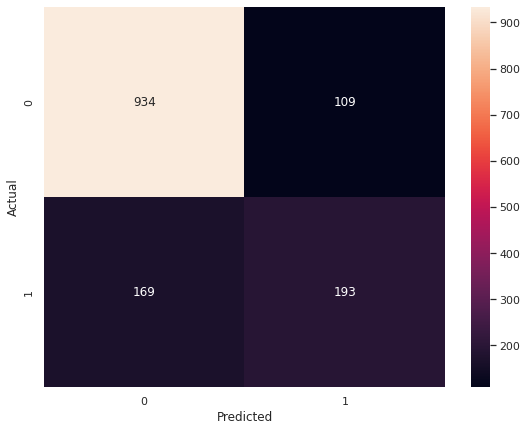

In [60]:
# Graph Confusion Matrix for functional API
cm_fnc = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_actual_fcn)

plt.figure(figsize=(9,7))
sns.heatmap(cm_fnc,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [61]:
# Define confusion matrix result into int value

TP_cm_fnc = int(cm_fnc[0,0])
FP_cm_fnc = int(cm_fnc[0,1])
FN_cm_fnc = int(cm_fnc[1,0])
TN_cm_fnc = int(cm_fnc[1,1])

In [62]:
# Print accuracy from confusion matrix
calc = (TP_cm_fnc+TN_cm_fnc)/(TP_cm_fnc+FP_cm_fnc+FN_cm_fnc+TN_cm_fnc)
print(f"Accuracy from confusion matrix")
print(f"{round(calc*100, 1)}%")

Accuracy from confusion matrix
80.2%


In [63]:
# Print recall for those who churn from confusion matrix
calc = (TN_cm_fnc)/(FP_cm_fnc+TN_cm_fnc)
print(f"Recall for those who churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who churn from confusion matrix
63.9%


In [64]:
# Print recall for those who did not churn from confusion matrix
calc = (TP_cm_fnc)/(TP_cm_fnc+FN_cm_fnc)
print(f"Recall for those who did not churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who did not churn from confusion matrix
84.7%


In [65]:
# Make classification report for functional API

print("Classification Reports is:\n",classification_report(y_test,y_pred_actual_fcn))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1043
           1       0.64      0.53      0.58       362

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.73      1405
weighted avg       0.79      0.80      0.80      1405



We can see that the accuracy value for this model based on the model evaluation is 77.8%. Similarly, the accuracy value for this model based on the confusion matrix is also 80.2%. Meanwhile, the accuracy of for this model based on the classification report is 80%. From these three, we can conclude that the accuracy is around 80% for this model.

For those who churn, the recall from confusion matrix is 63.9% while the recall from the classification report is 53%, which shows a quite difference between the two data. 

For those who did not churn, the recall from confusion matrix is 84.7% while the recall from the classification report is 90%, which also shows a quite difference between the two data. 

Overall, this model is a bit overfitted, although the model seems to be working alright in terms of accuracy of prediction. The recall for those who did not churn seems to be quite far and the recall for those who churn is even further in difference. 

Although the two models are very similar, we can see that the sequential API model is performing better from the accuracy and the shape of the epoch graph with loss and accuracy. Hence, I decided to pick the sequential API model to be improved further with hyperparameter tuning.

### Hyperparameter Tuning

In [66]:
# Define a test model for sequential API
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    sqt_model_test = keras.models.Sequential()
    sqt_model_test.add(keras.layers.InputLayer(input_shape=x_train.shape[1:]))
    for layer in range(n_hidden):
        sqt_model_test.add(keras.layers.Dense(n_neurons, activation="relu"))
    sqt_model_test.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    sqt_model_test.compile(loss="binary_crossentropy", optimizer=optimizer,  metrics=['accuracy'])
    return sqt_model_test

In [67]:
# Apply keras regressor on test model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [68]:
# Fit test model on train data
keras_reg.fit(x_train, y_train, epochs=100,
              validation_data=(x_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
141/141 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.7814 - val_loss: 0.4199 - val_accuracy: 0.7883
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8032 - val_loss: 0.4075 - val_accuracy: 0.7963
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8057 - val_loss: 0.4156 - val_accuracy: 0.7927
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8068 - val_loss: 0.4085 - val_accuracy: 0.7989
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8088 - val_loss: 0.4099 - val_accuracy: 0.8016
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8101 - val_loss: 0.4138 - val_accuracy: 0.7963
Epoch 7/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8153 - val_loss: 0.4080 - val_accuracy: 0.7989

In [69]:
# Apply randomizedsearchcv for finding best parameters for the sequential API model
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(x_train, y_train, epochs=100,
                  validation_data=(x_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6718 - val_loss: 0.5144 - val_accuracy: 0.7438
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7656 - val_loss: 0.4530 - val_accuracy: 0.7838
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.7977 - val_loss: 0.4349 - val_accuracy: 0.7963
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8020 - val_loss: 0.4275 - val_accuracy: 0.8034
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8010 - val_loss: 0.4250 - val_accuracy: 0.7989
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8003 - val_loss: 0.4208 - val_accuracy: 0.8007
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff9e4292c50>,
                   param_distributions={'learning_rate': [0.0006718218961904368,
                                                          0.0009080909628274834,
                                                          0.00955289886085042,
                                                          0.02158573925008178,
                                                          0.00778254053717612,
                                                          0.0006947673240085873,
                                                          0.0016690205596848963,
                                                          0.00033081191765297046,
                                                          0.007080211652501593,
                                                          0.00098458651536851...
                                                          0.01410639854

In [70]:
# Check best parameters for the sequential API model
rnd_search_cv.best_params_

{'n_neurons': 44, 'n_hidden': 0, 'learning_rate': 0.003785785054358825}

In [71]:
# Define the hyperparameter tuned sequential API model
sqt_model_hyper = rnd_search_cv.best_estimator_.model
sqt_model_hyper

### Hyperparameter Tuned Sequential API

In [72]:
# Training the data with hyperparameter tuned sequential model
history_sqt_hyper = sqt_model_hyper.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8057 - val_loss: 0.4108 - val_accuracy: 0.7980
Epoch 2/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8070 - val_loss: 0.4147 - val_accuracy: 0.7945
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8077 - val_loss: 0.4167 - val_accuracy: 0.7900
Epoch 4/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8079 - val_loss: 0.4148 - val_accuracy: 0.7980
Epoch 5/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8064 - val_loss: 0.4130 - val_accuracy: 0.8016
Epoch 6/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8075 - val_loss: 0.4195 - val_accuracy: 0.7883
Epoch 7/20
141/141 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8075 - val_loss: 0.4184 - val_accuracy: 0.7900
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

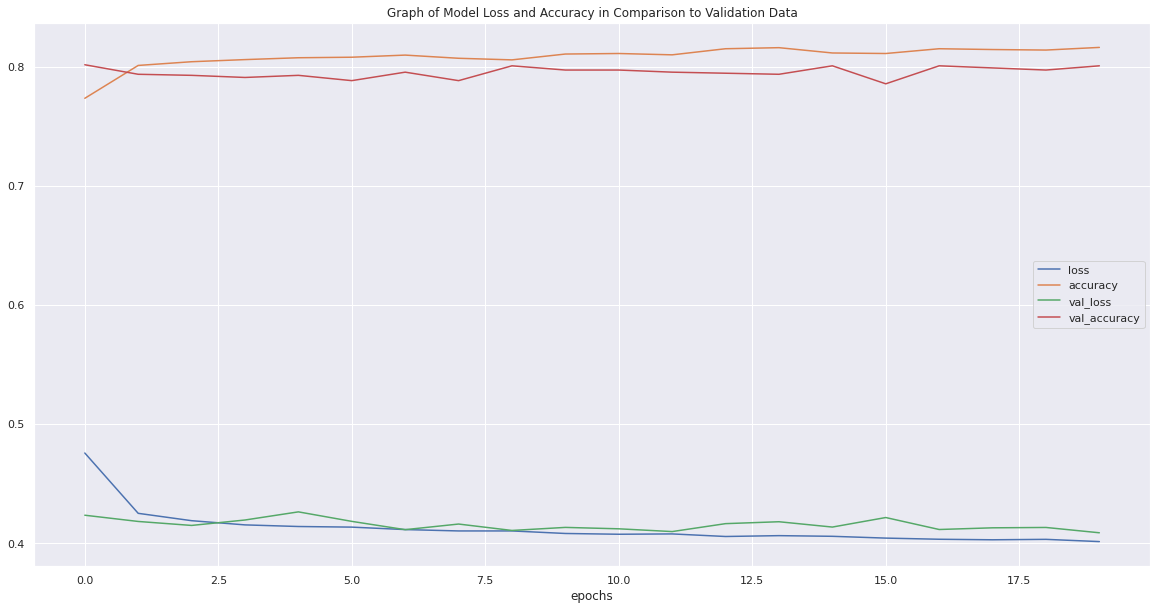

In [73]:
# Graph loss and accuracy of the model based on epochs
metrics = pd.DataFrame(history_sqt.history)
metrics.plot(figsize=(20, 10))
plt.title("Graph of Model Loss and Accuracy in Comparison to Validation Data")
plt.xlabel('epochs')
plt.show

From the result of the accuracy graph, we can see that for both the train data and the validation data, accuracy went up as epochs value increase, while the loss went down as epochs value increase. This show a very positive result for our model.

Additionally, we can also see that between the value of train data and the validation data there are smaller difference, compared to the first sequential API model that we made. Although train data is performing better than the validation data, the model is a good fit, since the difference between accuracy and loss in the train data and the validation data is not that big, as seen from the graph. 


In [74]:
# Measure model evaluate
sqt_model_hyper.evaluate(x_test, y_test)

44/44 [==============================] - 0s 903us/step - loss: 0.4347 - accuracy: 0.7865


[0.4347156584262848, 0.7864768505096436]

In [75]:
# Calculate y_pred value for sequential API and append into list
y_pred = sqt_model_hyper.predict(x_test)
y_pred_actual_sqt_hyper = []

for ele in y_pred:
  if ele > 0.5:
    y_pred_actual_sqt_hyper.append(1)
  else :
    y_pred_actual_sqt_hyper.append(0)

44/44 [==============================] - 0s 912us/step


Text(57.5, 0.5, 'Actual')

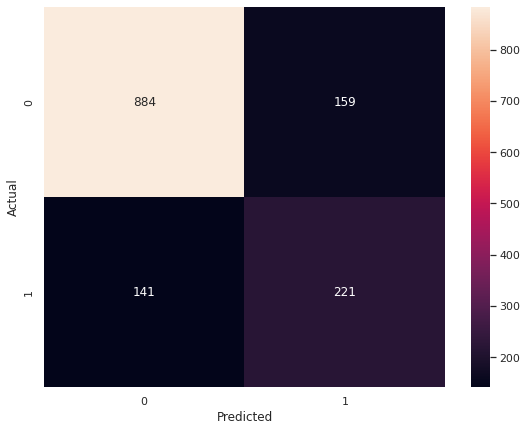

In [76]:
# Graph Confusion Matrix
cm_sqt_hyper = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_actual_sqt_hyper)

plt.figure(figsize=(9,7))
sns.heatmap(cm_sqt_hyper,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [77]:
# Define confusion matrix result into int value

TP_cm_sqt_hyper = int(cm_sqt_hyper[0,0])
FP_cm_sqt_hyper = int(cm_sqt_hyper[0,1])
FN_cm_sqt_hyper = int(cm_sqt_hyper[1,0])
TN_cm_sqt_hyper = int(cm_sqt_hyper[1,1])

In [78]:
# Print accuracy from confusion matrix
calc = (TP_cm_sqt_hyper+TN_cm_sqt_hyper)/(TP_cm_sqt_hyper+FP_cm_sqt_hyper+FN_cm_sqt_hyper+TN_cm_sqt_hyper)
print(f"Accuracy from confusion matrix")
print(f"{round(calc*100, 1)}%")

Accuracy from confusion matrix
78.6%


In [79]:
# Print recall for those who churn from confusion matrix
calc = (TN_cm_sqt_hyper)/(FP_cm_sqt_hyper+TN_cm_sqt_hyper)
print(f"Recall for those who churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who churn from confusion matrix
58.2%


In [80]:
# Print recall for those who did not churn from confusion matrix
calc = (TP_cm_sqt_hyper)/(TP_cm_sqt_hyper+FN_cm_sqt_hyper)
print(f"Recall for those who did not churn from confusion matrix")
print(f"{round(calc*100, 1)}%")

Recall for those who did not churn from confusion matrix
86.2%


In [81]:
# Make classification report for sequential API

print("Classification Reports is:\n",classification_report(y_test,y_pred_actual_sqt_hyper))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1043
           1       0.58      0.61      0.60       362

    accuracy                           0.79      1405
   macro avg       0.72      0.73      0.73      1405
weighted avg       0.79      0.79      0.79      1405



We can see that the accuracy value for this hyperparameter tuned model based on the model evaluation is 78.7%, which is similar to the normal sequential API model. Similarly, the accuracy value for this model based on the confusion matrix is also 78.6%. Meanwhile, the accuracy of for this model based on the classification report is 79%. From these three, we can conclude that the accuracy is around 79% for this model. Although there are a tiny bit of value difference, generally the accuracy remains the same as our normal sequential API model.

For those who churn, the recall from confusion matrix is 58.2% while the recall from the classification report is 61%, which shows a quite difference between the two data. This result is lower than the result of our normal sequential API model.

For those who did not churn, the recall from confusion matrix is 85% while the recall from the classification report is 85%, which also shows a quite difference between the two data. This result is is similar with the result of our normal sequential API model.

Overall, this model seems to be a good fit, although the model accuracy of prediction for those who churn is quite low. Compared to our earlier model, this one perform better.

# IX. Model Saving

For model saving, I will be saving the hyperparameter tuned sequential API model, which is the best model from the models I have made.

In [82]:
# Save the preprocess file
import joblib
joblib.dump(preproc_pipeline, "data_preprocessor.pkl")

['data_preprocessor.pkl']

In [83]:
# Freeze model
sqt_model_hyper.trainable = False

In [84]:
# Save model
sqt_model_hyper.save("churn_model")

In [85]:
# Zip model
! zip -r churn_model.zip churn_model

  adding: churn_model/ (stored 0%)
  adding: churn_model/assets/ (stored 0%)
  adding: churn_model/keras_metadata.pb (deflated 78%)
  adding: churn_model/saved_model.pb (deflated 86%)
  adding: churn_model/variables/ (stored 0%)
  adding: churn_model/variables/variables.index (deflated 55%)
  adding: churn_model/variables/variables.data-00000-of-00001 (deflated 60%)


# X. Model Inference



### Preparing Inference Data

In [86]:
# Check inference data
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,23,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),55.80,1327.85,0
1,Male,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,39.30,0
2,Male,Yes,Yes,Yes,28,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic check,51.00,1381.80,0
3,Male,No,Yes,Yes,70,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,1360.25,0
4,Male,No,Yes,Yes,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,1
5,Female,No,No,Yes,43,Yes,No,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,63.95,2737.05,0
6,Female,No,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45,0
7,Female,No,Yes,Yes,12,No,No phone service,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic),30.25,368.85,0
8,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.70,342.40,1
9,Male,No,Yes,Yes,23,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),57.20,1423.35,0


In [87]:
# Splitting dataset into x_inf and y_inf
x_inf = data_inf.drop('Churn', axis=1)
y_inf = data_inf['Churn']

In [88]:
# Get duplicate of y_inf for making comparison table
y_inf_data = copy.copy(y_inf)

In [89]:
# Fit pipeline to data
x_inf = preproc_pipeline.fit_transform(x_inf)

[ColumnTransformer] ....... (1 of 2) Processing numbers, total=   0.0s
[ColumnTransformer] .... (2 of 2) Processing categories, total=   0.0s


### Sequential API

In [90]:
# Measure model evaluate
sqt_model.evaluate(x_inf, y_inf)

1/1 [==============================] - 0s 14ms/step - loss: 0.3674 - accuracy: 0.9000


[0.36743393540382385, 0.8999999761581421]

In [91]:
# Calculate y_pred value for sequential API and append into list
y_pred_inf = sqt_model.predict(x_inf)
y_pred_actual_sqt_inf = []

for ele in y_pred_inf:
  if ele > 0.5:
    y_pred_actual_sqt_inf.append(1)
  else :
    y_pred_actual_sqt_inf.append(0)

1/1 [==============================] - 0s 12ms/step


In [92]:
# Make result into dataframe
y_inf_sqt = pd.DataFrame (y_pred_actual_sqt_inf[:10], columns = ['sequential prediction'])

In [93]:
# Compare result with actual result
df_inf = pd.concat([y_inf_data, y_inf_sqt], axis=1)
df_inf

,Churn,sequential prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


We can see in our sequential API model that from the 10 inference data we took, the income prediction is 90% accurate. This shows that our sequential API model is working quite well when dealing with new data outside the training data.

### Functional API

In [94]:
# Measure model evaluate
fcn_model.evaluate(x_inf, y_inf)

1/1 [==============================] - 0s 13ms/step - loss: 0.3454 - accuracy: 0.9000


[0.3454269766807556, 0.8999999761581421]

In [95]:
# Calculate y_pred value for sequential API and append into list
y_pred_inf = fcn_model.predict(x_inf)
y_pred_actual_fcn_inf = []

for ele in y_pred_inf:
  if ele > 0.5:
    y_pred_actual_fcn_inf.append(1)
  else :
    y_pred_actual_fcn_inf.append(0)

1/1 [==============================] - 0s 12ms/step


In [96]:
# Make result into dataframe
y_inf_fcn = pd.DataFrame (y_pred_actual_fcn_inf[:10], columns = ['functional prediction'])

In [97]:
# Compare result with actual result
df_inf = pd.concat([y_inf_data, y_inf_fcn], axis=1)
df_inf

,Churn,functional prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


We can see in our functional API model that from the 10 inference data we took, the income prediction is 90% accurate. This shows that our functional API model is working quite well when dealing with new data outside the training data.

### Hyperparameter Tuned Sequential API

In [99]:
# Measure model evaluate
sqt_model_hyper.evaluate(x_inf, y_inf)

1/1 [==============================] - 0s 28ms/step - loss: 0.3433 - accuracy: 0.9000


[0.3433048129081726, 0.8999999761581421]

In [100]:
# Calculate y_pred value for sequential API and append into list
y_pred_inf = sqt_model_hyper.predict(x_inf)
y_pred_actual_sqt_hyper_inf = []

for ele in y_pred_inf:
  if ele > 0.5:
    y_pred_actual_sqt_hyper_inf.append(1)
  else :
    y_pred_actual_sqt_hyper_inf.append(0)

1/1 [==============================] - 0s 28ms/step


In [101]:
# Make result into dataframe
y_inf_sqt_hyper = pd.DataFrame (y_pred_actual_sqt_hyper_inf[:10], columns = ['sequential hyperparameter prediction'])

In [102]:
# Compare result with actual result
df_inf = pd.concat([y_inf_data, y_inf_sqt_hyper], axis=1)
df_inf

,Churn,sequential hyperparameter prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


We can see in our sequential API hyperparameter tuned model that from the 10 inference data we took, the income prediction is 90% accurate. This shows that our sequential API hyperparameter tuned model is working quite well when dealing with new data outside the training data.

### Conclusion

In [103]:
# Compare result with actual result
df_inf = pd.concat([y_inf_data,y_inf_sqt, y_inf_fcn, y_inf_sqt_hyper], axis=1)
df_inf

,Churn,sequential prediction,functional prediction,sequential hyperparameter prediction
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,1,0,0,0
9,0,0,0,0


Overall, from the result of the inference data prediction, we can see that overall our models are working with 90% accuracy. This is an interesting result and this result might just come because we only have small sample of inference data. For further improvement, adjustment might be needed to train the model and more inference data to test the model would be needed.

# XI. Pengambilan Kesimpulan

From my analysis above, I have found that:

In the exploratory data analysis: 
- a quarter of the customers from the data are stopped using Telco's product or service during a certain time frame.
- Senior customers have more tendency to churn, hence we can see that age does affect churn rate.
- Customers without partners or dependents have more tendency to churn, as they do not require telecommunication services as much as customers with partners or dependents. 
- Phone customers have more tendency to churn, which implies that Telco's phone services showed high customer dissatisfaction.
- Customers with fiber optics internet have more tendency to churn, unlike customers with DSL internet. This implies a problem in fiber optics internet service from Telco.
- Internet customers without online security, online backup, device protection, and tech support services have more tendency to churn.
- TV and movies streaming services in internet customers does not affect customers tendency to churn.
- Customers with longer tenure and contracts show more commitment and loyalty, as shown by the less churn tendency the longer they became Telco's customers.
- From the graph, we can see that there are more tendency to churn on customers with paperless bill and on customers with electronic check compared to other payment methods. This could implies a problem in electronic check payment system or e-billing system.
- There are not much difference in monthly payments between customers who continue and stopped using Telco's product or service during a certain time frame.

In the model evaluation: 
- both sequential API and functional API model are overfitting.
- The sequential API hyperparameter tuned model does not show a lot of difference from the default sequential API model in terms of accuracy based on classification report and confusion matrix.
- All three models have similar accuracy from the result of classification reports.
- Optimizing the parameters of the model improve model from overfitting into a good fit.  

In the model inference:
- all three models are working with 90% accuracy in inference data
- The accuracy is in line with the similarities of three models accuracy calculation.
- The size of the inference data is small and this could be the reason of the accuracy / lack of accuracy. 

Future improvement:
- Get more data for better accuracy
- Try to handle missing datas and outliers data even better for more accuracy
- Try out other algorithm as comparison